# Crop Recommendation

**Dataset - Crop_recommendation.csv**



# **1.	 Data Visualization and Exploration**

In [ ]:
#Imports
import pandas as pd
from tabulate import tabulate
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (precision_score, recall_score,
                             f1_score, classification_report, confusion_matrix,
                             roc_auc_score)
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import LabelEncoder
import pickle
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Read the Crop_recommendation.csv file and print column names in tabular format

df = pd.read_csv('Crop_recommendation.csv')
table = [['Column Name']]
for col in df.columns:
  table.append([col])
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))


╒═══════════════╕
│ Column Name   │
╞═══════════════╡
│ N             │
├───────────────┤
│ P             │
├───────────────┤
│ K             │
├───────────────┤
│ temperature   │
├───────────────┤
│ humidity      │
├───────────────┤
│ ph            │
├───────────────┤
│ rainfall      │
├───────────────┤
│ label         │
╘═══════════════╛


## Data Fields

- **N**: Ratio of Nitrogen content in soil (kg/ha)
- **P**: Ratio of Phosphorous content in soil (kg/ha)
- **K**: Ratio of Potassium content in soil (kg/ha)
- **Temperature**: Temperature in degree Celsius
- **Humidity**: Relative humidity in %
- **pH**: pH value of the soil
- **Rainfall**: Rainfall in mm


### **1.1	 Print 2 rows for sanity check to identify all the features present in the dataset and if the target matches with them**



In [ ]:
#Print 2 rows for sanity check to identify all the features present in the dataset and if the target matches with them.

print(df.head(2))


    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice



### **1.2	Comment on class imbalance with appropriate visualization method.**






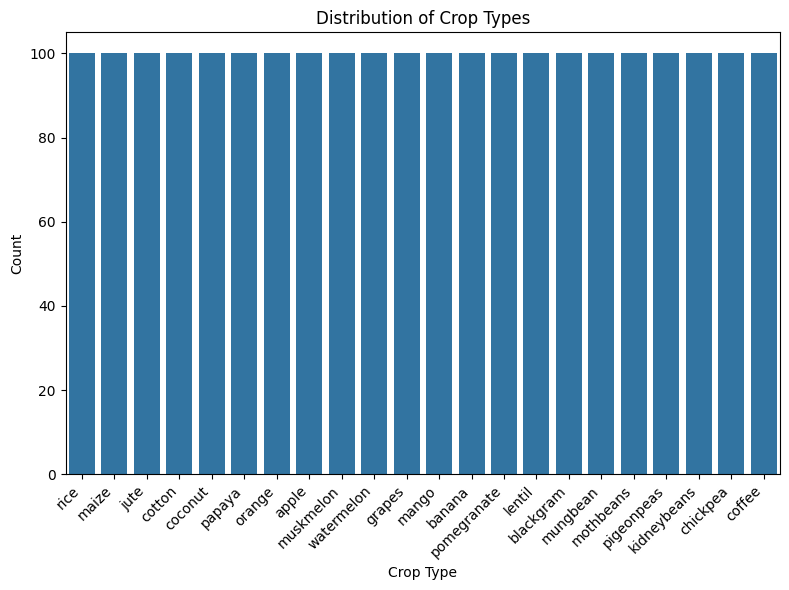

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64


In [ ]:
#Find and Comment on class imbalance with appropriate visualization method
# Count the occurrences of each crop type
crop_counts = df['label'].value_counts()

# Create a bar plot to visualize the distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=crop_counts.index, y=crop_counts.values)
plt.xlabel('Crop Type')
plt.ylabel('Count')
plt.title('Distribution of Crop Types')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Print the count of each crop type
print(crop_counts)



**Comment on Class Imbalance**: Balanced Dataset: The provided distribution shows that each class has exactly 100 instances, making it a **balanced dataset**.


### **1.3	Provide appropriate visualizations to get an insight about the dataset.**


In [ ]:
print("\nStatistical Information for numerical columns:")

# descriptive statistics
description = df.describe()

# Round the statistics to 2 decimal places
description_rounded = description.round(2)

# Print the rounded statistics
print(description_rounded)



Statistical Information for numerical columns:
             N        P        K  temperature  humidity       ph  rainfall
count  2200.00  2200.00  2200.00      2200.00   2200.00  2200.00   2200.00
mean     50.55    53.36    48.15        25.62     71.48     6.47    103.46
std      36.92    32.99    50.65         5.06     22.26     0.77     54.96
min       0.00     5.00     5.00         8.83     14.26     3.50     20.21
25%      21.00    28.00    20.00        22.77     60.26     5.97     64.55
50%      37.00    51.00    32.00        25.60     80.47     6.43     94.87
75%      84.25    68.00    49.00        28.56     89.95     6.92    124.27
max     140.00   145.00   205.00        43.68     99.98     9.94    298.56


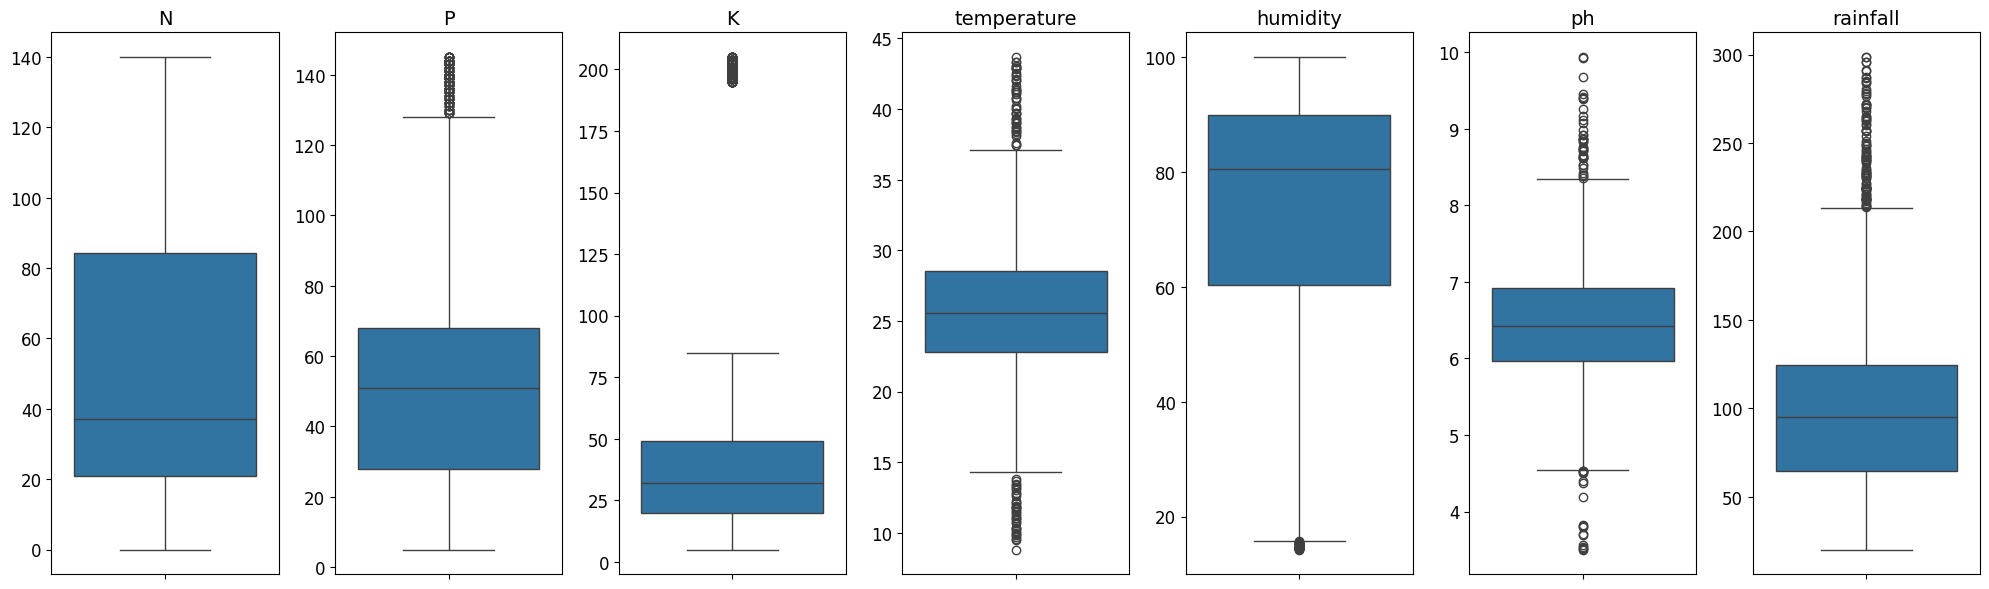

In [ ]:


# Assuming cropdf is already loaded
data1 = df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]

# Set up the figure and axes
fig, axes = plt.subplots(nrows=1, ncols=len(data1.columns), figsize=(20, 6), sharey=False)

# Font size settings
title_fontsize = 14
label_fontsize = 12

# Plot each feature's box plot in the corresponding subplot
for i, feature in enumerate(data1.columns):
    sns.boxplot(data=data1[feature], ax=axes[i])
    axes[i].set_title(feature, fontsize=title_fontsize)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')  # Remove y-axis labels to prevent overlap
    axes[i].tick_params(axis='x', labelsize=label_fontsize)
    axes[i].tick_params(axis='y', labelsize=label_fontsize)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


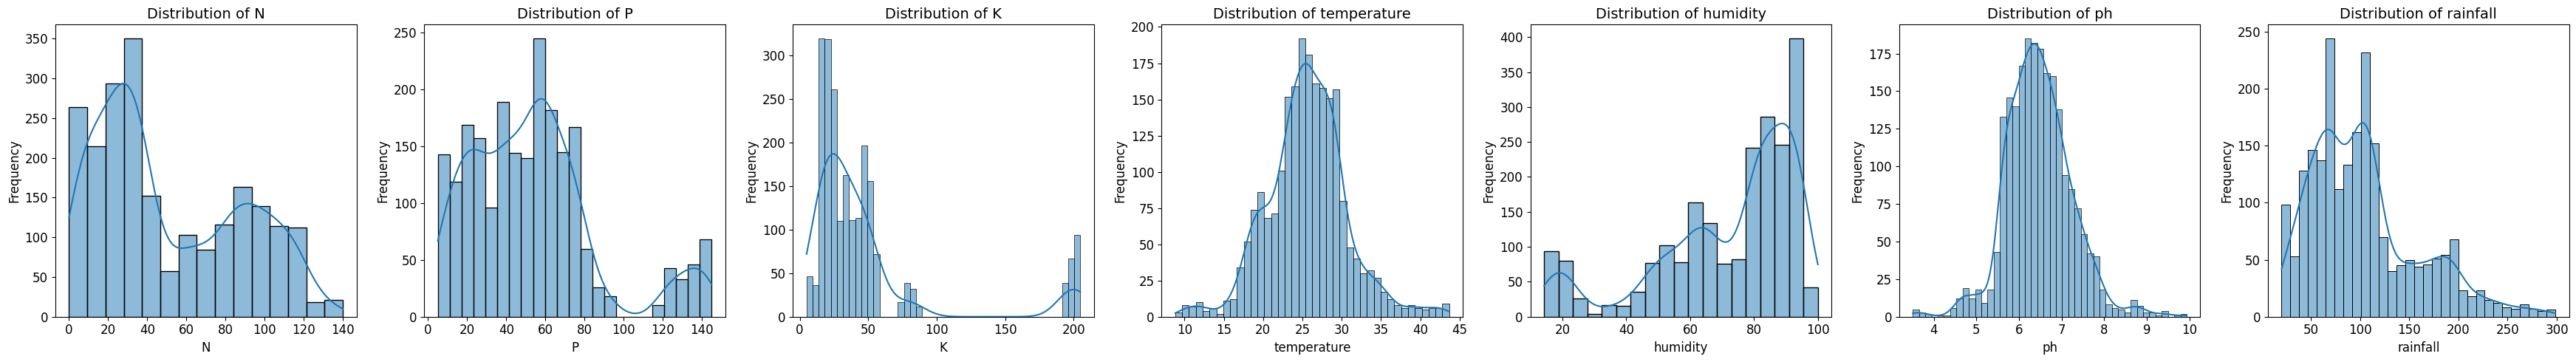

In [ ]:


# Assuming df is already loaded and 'label' column is the last one
features = df.columns[:-1]  # Exclude the 'label' column

# Set up the figure and axes
num_features = len(features)
fig, axes = plt.subplots(nrows=1, ncols=num_features, figsize=(num_features * 5, 5), sharey=False)

# Font size settings
title_fontsize = 14
label_fontsize = 12

# Plot each feature's histogram in the corresponding subplot
for i, column in enumerate(features):
    sns.histplot(df[column], kde=True, ax=axes[i])
    axes[i].set_xlabel(column, fontsize=label_fontsize)
    axes[i].set_ylabel('Frequency', fontsize=label_fontsize)
    axes[i].set_title(f'Distribution of {column}', fontsize=title_fontsize)
    axes[i].tick_params(axis='x', labelsize=label_fontsize)
    axes[i].tick_params(axis='y', labelsize=label_fontsize)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


**Summary:**

- **Nutrient Variability:**  **Nitrogen (N), Phosphorus (P), and Potassium (K)** show considerable variability, which could influence crop growth and nutrient requirements. Understanding this variability is crucial for precise fertilization recommendations.

- The **temperature** range (8.83°C to 43.68°C) indicates diverse growing conditions, from cooler to warmer climates. This range highlights the need for crops that can tolerate a wide range of temperatures.

- **Humidity:** The high variability in humidity (14.26% to 99.98%) suggests different regions may have distinct humidity levels, which can impact plant transpiration and water needs. Crop recommendations might need to account for varying humidity levels.

- **Rainfall Patterns:** Rainfall shows significant variability, which can impact water availability for crops. Regions with low rainfall might require irrigation, while areas with high rainfall might need drainage solutions.

- The soil **pH values** are relatively consistent with a moderate range. Most crops prefer slightly acidic to neutral pH, making the majority of soils in the dataset suitable for general crop growth.

- **Outliers and Extremes:** Features like Potassium (K) and Rainfall have a wide range, with some extreme values. It’s important to consider these outliers in crop recommendations, as they could indicate special conditions or data entry errors.

- **Standard Deviations:**High standard deviations in nutrients and climatic factors suggest substantial diversity in the dataset, which might require tailored recommendations for different regions.

### **1.4	Do the correlational analysis on the dataset. Provide a visualization for the same.**


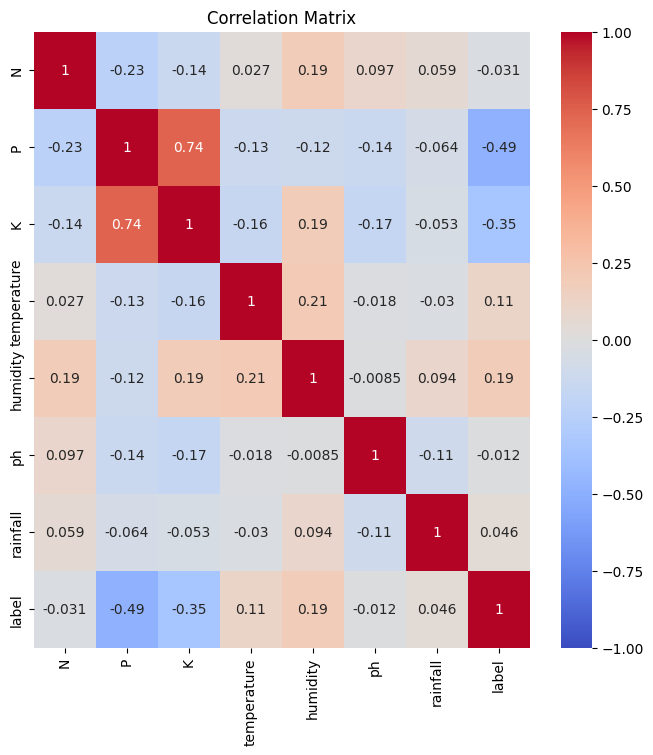

In [ ]:
#correlation analysis
# Encode the target variable (Crop) as it's categorical

label_encoder = LabelEncoder()
df2 = df.copy()
df2['label'] = label_encoder.fit_transform(df2['label'])
# Compute the correlation matrix
correlation_matrix = df2.corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 8))

# Create a heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Add a title to the heatmap
plt.title('Correlation Matrix')

# Display the heatmap
plt.show()


The correlation matrix shown visualizes the relationships between different features in the dataset. Each cell in the matrix represents the Pearson correlation coefficient between two features, ranging from -1 to 1. A value close to 1 indicates a strong positive correlation, a value close to -1 indicates a strong negative correlation, and a value close to 0 indicates little or no correlation.

### Correlation Analysis
Here are some significant correlations observed in the matrix:

1. **P and K**: positive correlation (0.74), suggesting that as the level of P increases, the level of K also tends to increase.
2. **P and N**: Moderate negative correlation (-0.23), implying that as the level of P increases, the level of N tends to decrease.
3. **Temperature and Humidity**: Moderate positive correlation (0.21), indicating that as temperature increases, humidity also tends to increase.


### Justification
We **should not eliminate any feature** because the correlation matrix for this dataset indicates that there are no two features that have a very very strong correlation with one another. Also all the columns have slight correlation with the label column.

### **1.5	Any other visualization specific to the problem statement.**

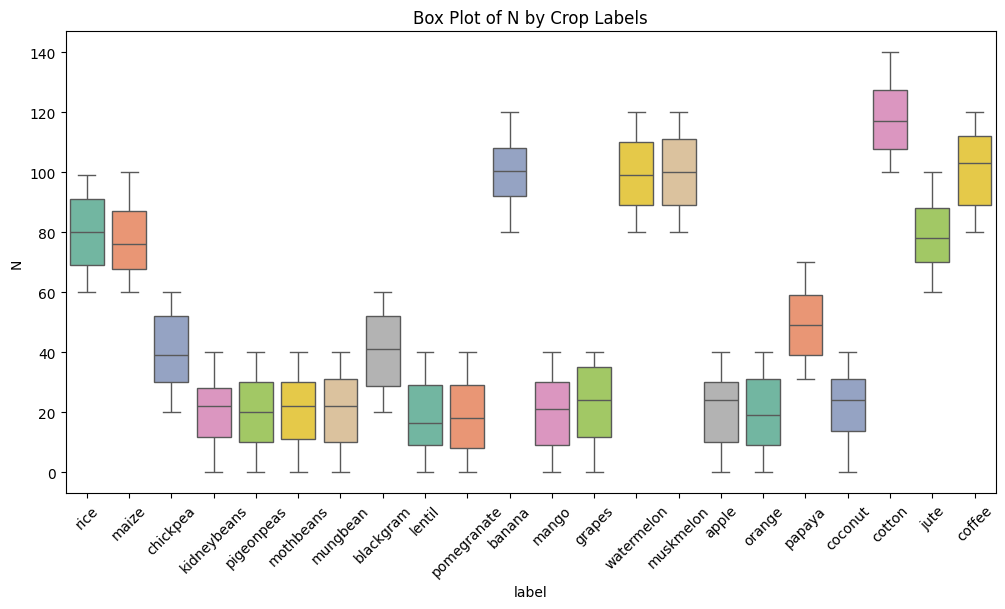

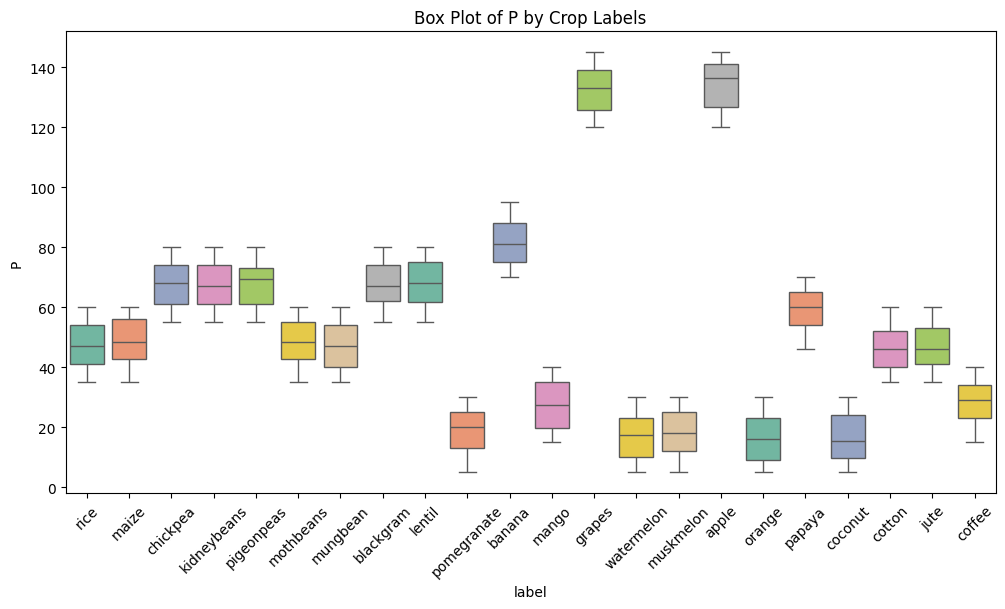

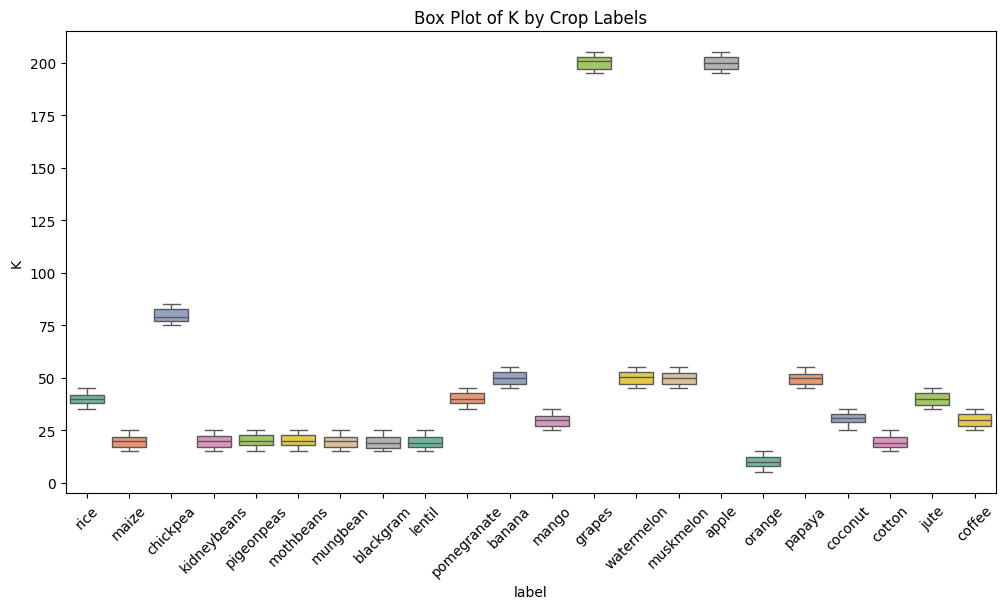

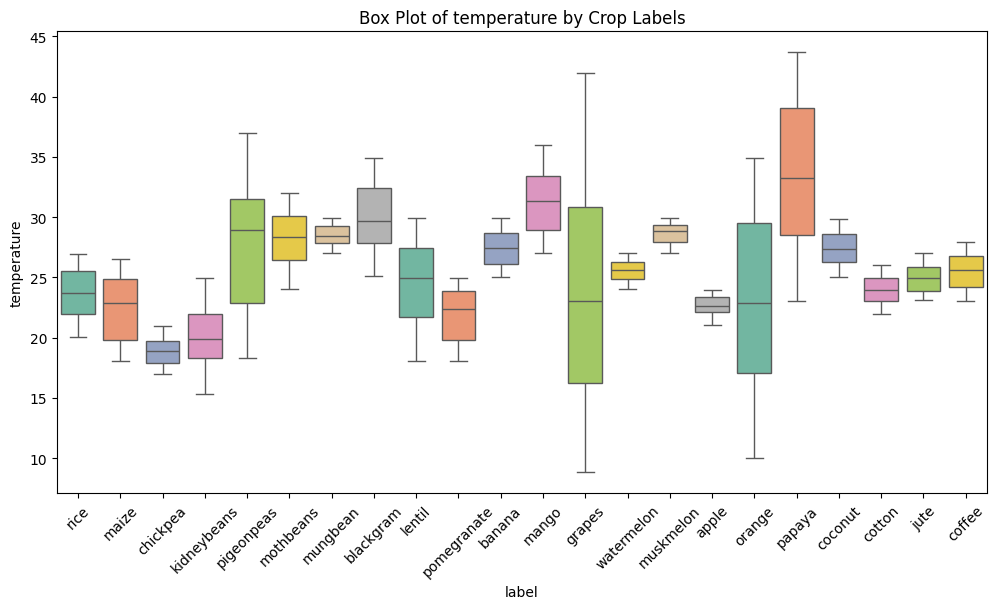

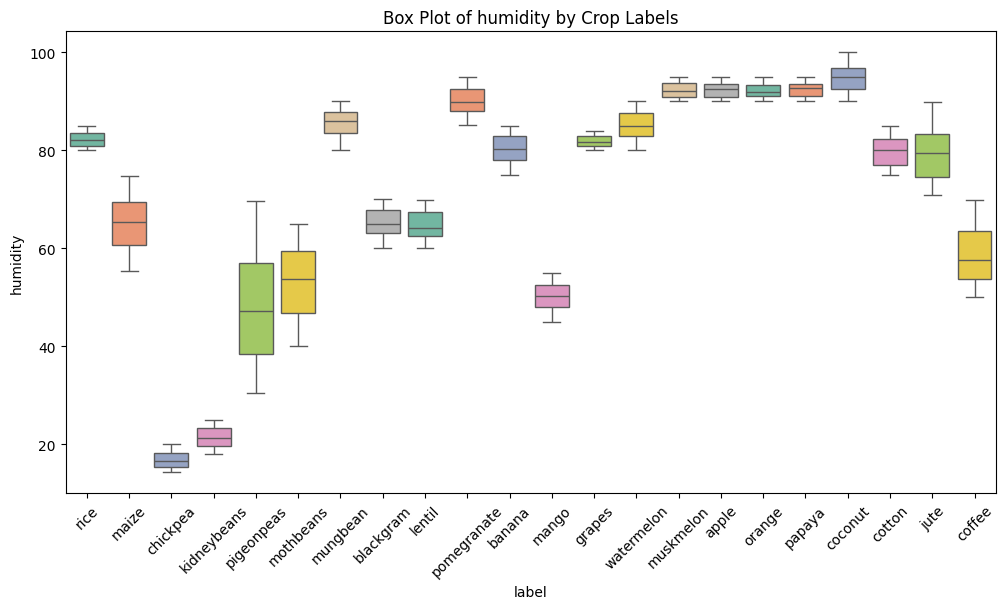

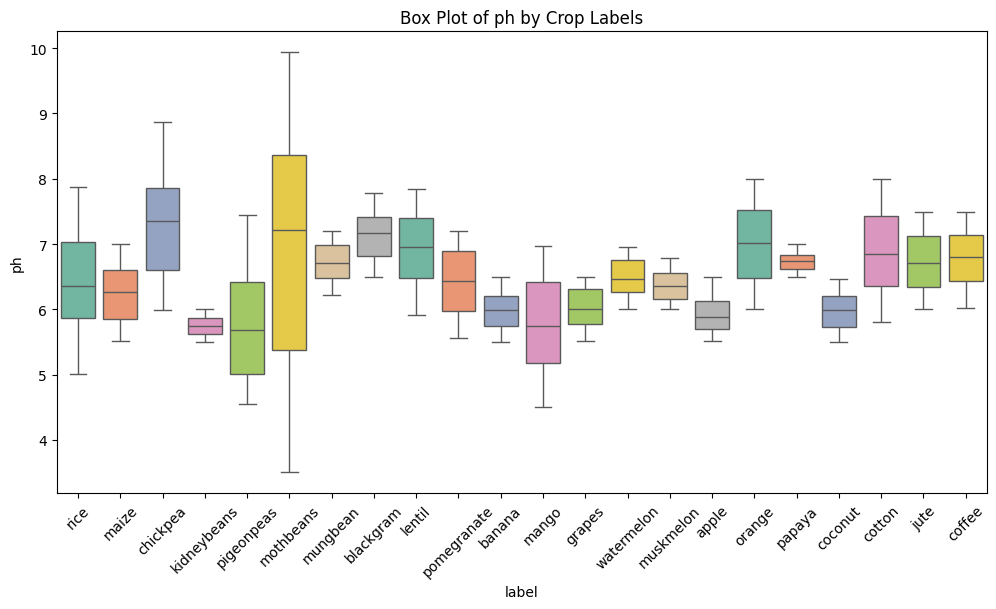

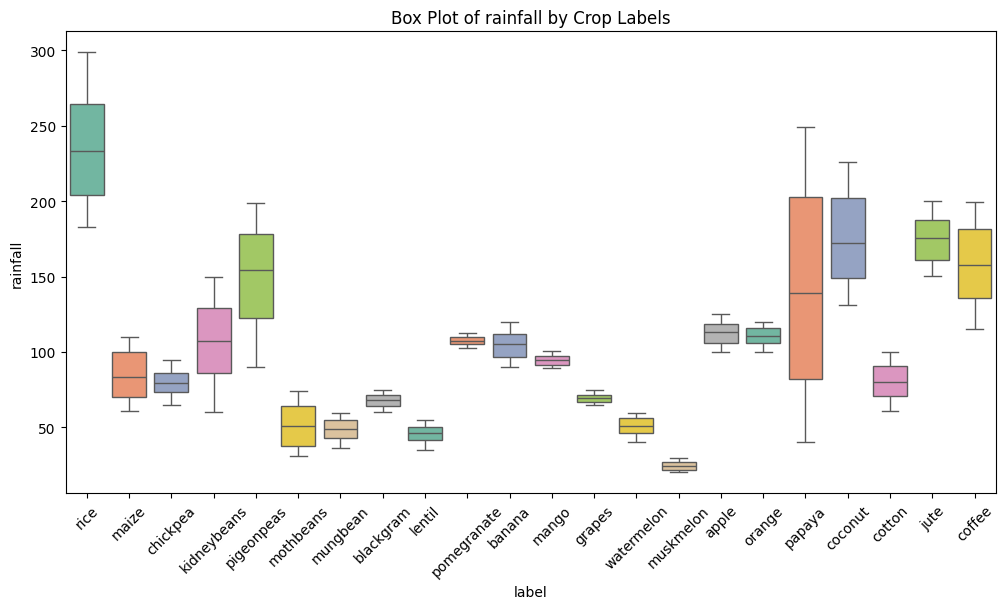

In [ ]:
numerical_columns = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
for column in numerical_columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='label', y=column, hue='label', data=df, palette='Set2')
    plt.title(f'Box Plot of {column} by Crop Labels')
    plt.xticks(rotation=45)
    plt.show()




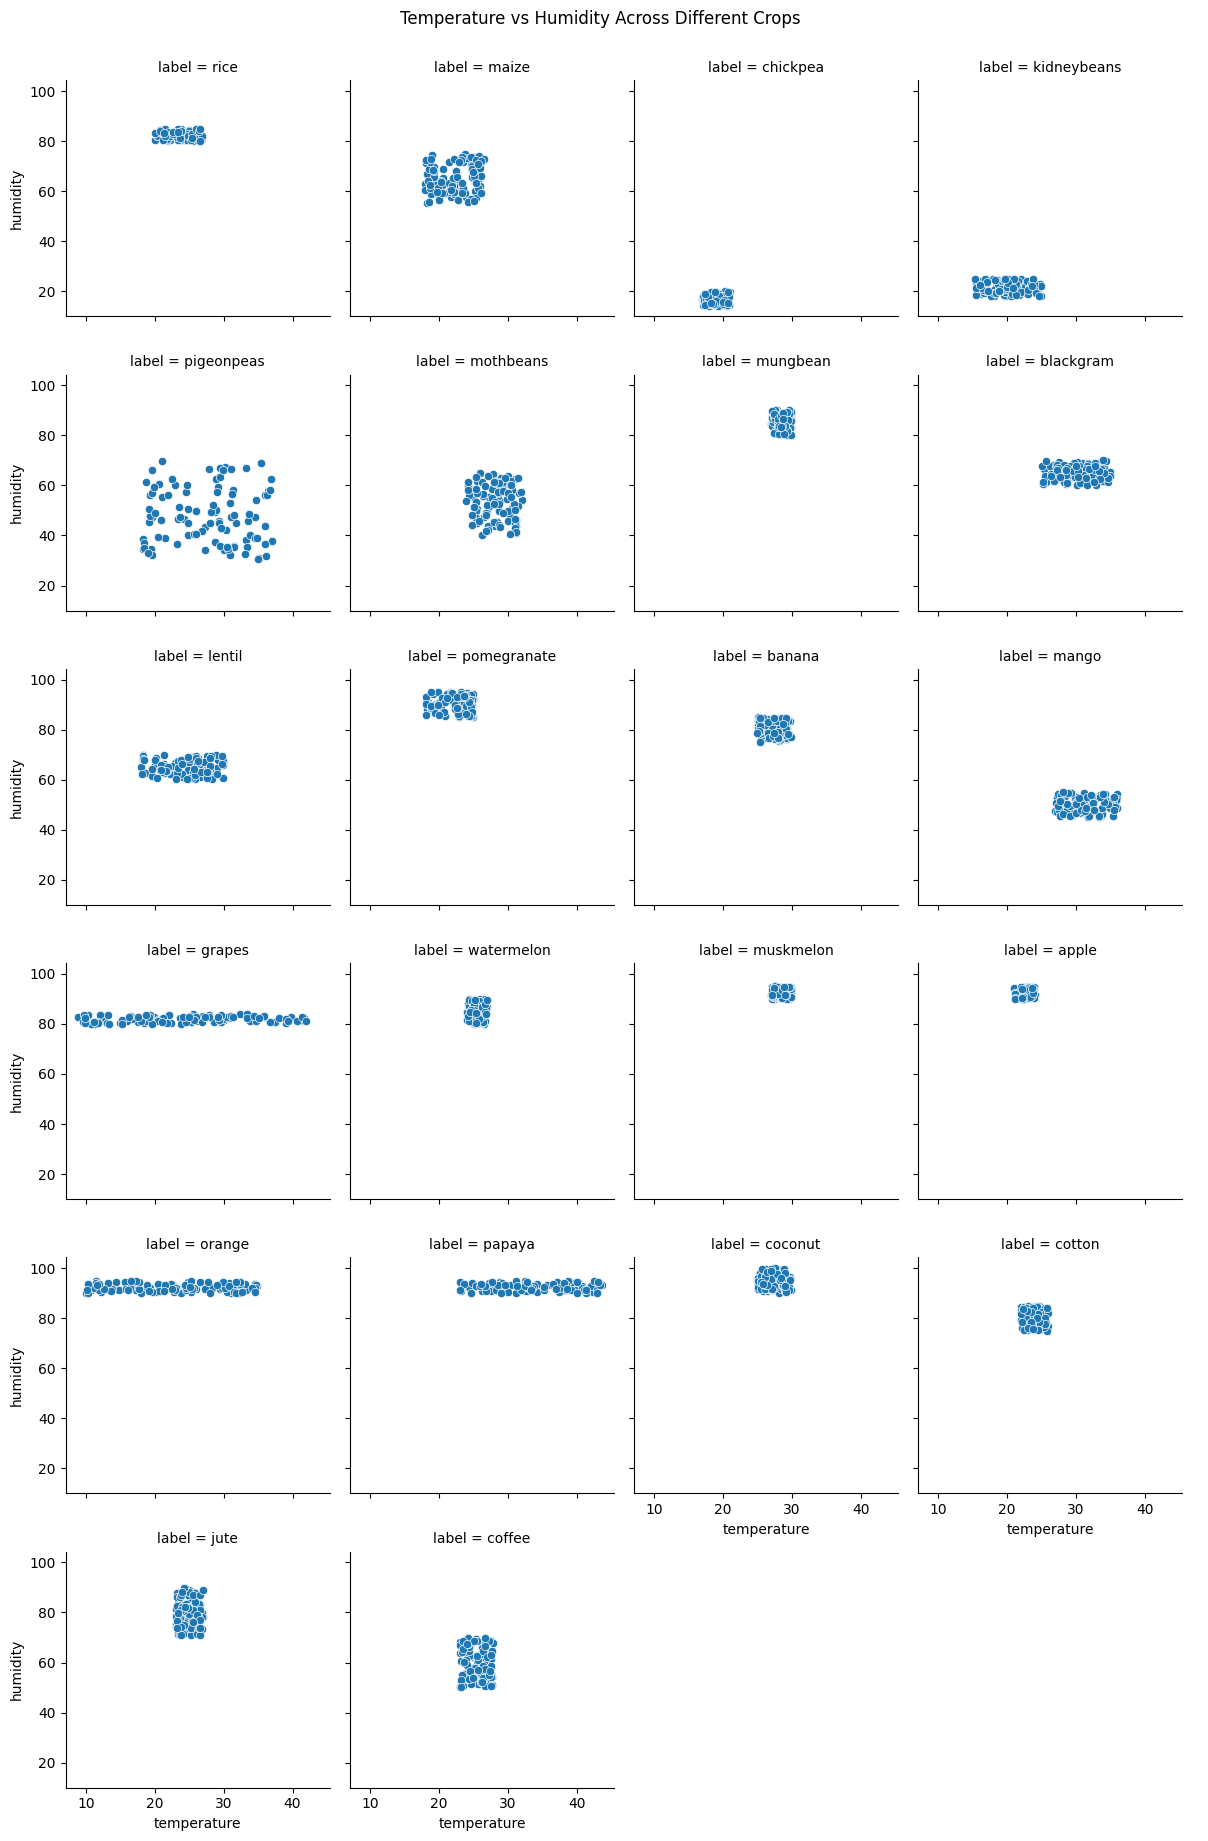

In [ ]:
g = sns.FacetGrid(df, col="label", col_wrap=4, height=3, palette='Set2')
g.map(sns.scatterplot, "temperature", "humidity")
g.add_legend()
plt.suptitle('Temperature vs Humidity Across Different Crops', y=1.02)
plt.show()


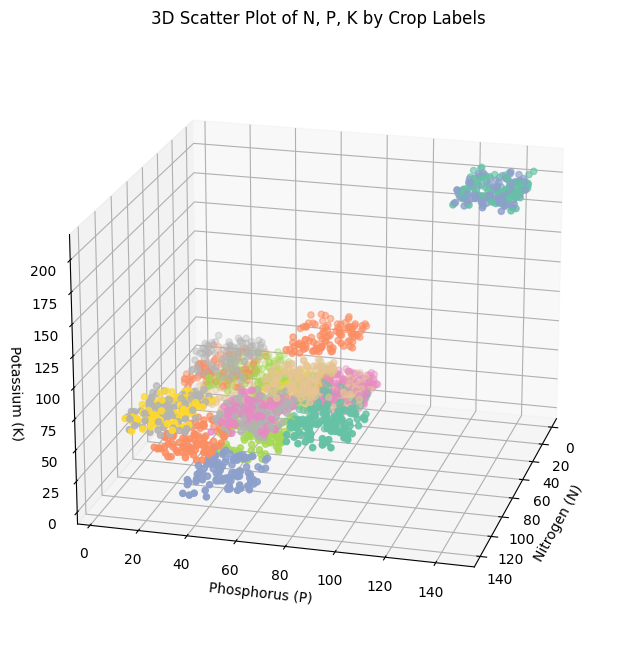

In [ ]:

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['N'], df['P'], df['K'], c=df['label'].astype('category').cat.codes, cmap='Set2')
ax.set_xlabel('Nitrogen (N)')
ax.set_ylabel('Phosphorus (P)')
ax.set_zlabel('Potassium (K)')
ax.set_title('3D Scatter Plot of N, P, K by Crop Labels')
ax.view_init(elev=20, azim=15)
plt.show()


# **2.	 Data Visualization and Exploration**

### **2.1.1	Appropriate pre-processing of the data like identifying NULL or Missing Values.**
>



In [ ]:
# Check the column names
print("Columns in the DataFrame:", df.columns)

Columns in the DataFrame: Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')


In [ ]:

# Check for NULL missing values
missing_values = df.isnull().sum()

# If there are missing values
if missing_values.any():
    print("Missing Values per Column:\n", missing_values)

    # Drop rows with any missing values
    #df_cleaned = df.dropna()
    #print("Rows with missing values dropped. Remaining rows:", df_cleaned.shape[0])

    # Impute missing values (example: using mean)
    df.fillna(df.mean(), inplace=True)
    print("Missing values imputed with mean.")
else:
    print("No missing values found.")
    # Creating a DataFrame to display the missing values in tabular format
    missing_summary = pd.DataFrame({'Column Name': missing_values.index, 'Missing Values': missing_values.values})

    # Ensure pandas displays all columns
    pd.set_option('display.max_rows', None)

    # Display the summary including columns with 0 missing values
    print("\nSummary of Missing Values:")
    print(missing_summary)

    # Resetting the option back to default
    pd.reset_option('display.max_rows')

No missing values found.

Summary of Missing Values:
   Column Name  Missing Values
0            N               0
1            P               0
2            K               0
3  temperature               0
4     humidity               0
5           ph               0
6     rainfall               0
7        label               0



### **2.1.2	Handling of outliers if present in the dataset.**


Outliers in 'N':
Series([], Name: N, dtype: int64)

Outliers in 'P':
1200    130
1201    144
1204    131
1206    140
1209    134
Name: P, dtype: int64

Outliers in 'K':
1200    195
1201    204
1202    205
1203    196
1204    196
Name: K, dtype: int64

Outliers in 'temperature':
1203    37.465668
1205    39.648519
1207    12.141907
1208    12.756796
1209    39.040720
Name: temperature, dtype: float64

Outliers in 'humidity':
202    15.405897
203    15.658092
205    15.403121
211    15.225390
212    14.697653
Name: humidity, dtype: float64

Outliers in 'ph':
209    8.753795
210    8.718193
213    8.490127
222    8.519976
232    8.829273
Name: ph, dtype: float64

Outliers in 'rainfall':
1    226.655537
2    263.964248
3    242.864034
4    262.717340
5    251.055000
Name: rainfall, dtype: float64


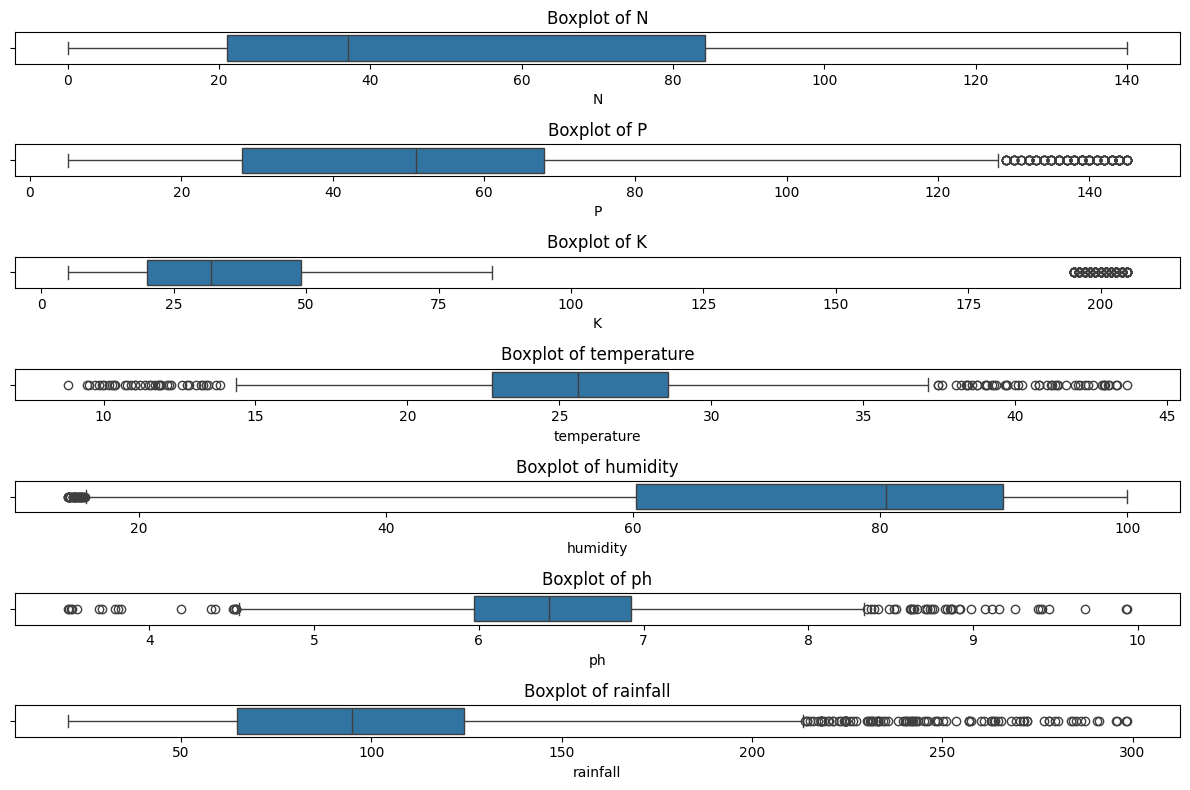


Summary of cleaned data (after removing outliers):
                 N            P            K  temperature     humidity  \
count  1768.000000  1768.000000  1768.000000  1768.000000  1768.000000   
mean     54.332014    44.850679    31.715498    25.836913    70.114374   
std      38.436640    22.624973    15.717006     4.168810    21.818135   
min       0.000000     5.000000     5.000000    14.343205    15.755940   
25%      22.000000    25.000000    19.000000    23.411834    58.245751   
50%      40.000000    45.000000    26.000000    25.944613    76.734802   
75%      90.000000    63.000000    44.000000    28.572096    88.165800   
max     140.000000    95.000000    85.000000    37.131650    99.981876   

                ph     rainfall  
count  1768.000000  1768.000000  
mean      6.481933    98.002216  
std       0.681211    48.275844  
min       4.546466    20.211267  
25%       6.026821    59.413838  
50%       6.466501    93.521200  
75%       6.932295   122.063586  
max      

In [ ]:
# Identify outliers using IQR (Interquartile Range)
def detect_outliers_iqr(data, threshold=1.5):
    """Detect outliers using IQR method."""
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (threshold * IQR)
    upper_bound = Q3 + (threshold * IQR)
    return data[(data < lower_bound) | (data > upper_bound)]

# Example for numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns

# Detect and display outliers for each numerical column
outliers = {}
for col in numerical_cols:
    outliers[col] = detect_outliers_iqr(df[col])
    print(f"\nOutliers in '{col}':")
    print(outliers[col].head())

# Visualize outliers using box plots
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols), 1, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# Handling outliers
# Option 1: Remove outliers
df_cleaned = df.copy()
for col in numerical_cols:
    outliers = detect_outliers_iqr(df[col])
    df_cleaned = df_cleaned[~df_cleaned[col].isin(outliers)]

# Option 2: Cap outliers (Winsorization)
def cap_outliers(data, threshold=1.5):
    """Cap outliers to the threshold values."""
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (threshold * IQR)
    upper_bound = Q3 + (threshold * IQR)
    data = np.where(data < lower_bound, lower_bound, data)
    data = np.where(data > upper_bound, upper_bound, data)
    return data

df_capped = df.copy()
for col in numerical_cols:
    df_capped[col] = cap_outliers(df_capped[col])

# Verify the changes
print("\nSummary of cleaned data (after removing outliers):")
print(df_cleaned.describe())

print("\nSummary of capped data (after Winsorization):")
print(df_capped.describe())


**Handle Outliers:**

**Remove Outliers:** Filter out rows where outlier values are detected.

**Cap Outliers (Winsorization):** Replace outlier values with the nearest threshold value (either lower or upper bound).


Skewness of numerical columns after outlier removal:
N              0.348045
P              0.004145
K              1.001481
temperature   -0.069429
humidity      -0.944651
ph            -0.067378
rainfall       0.536958
dtype: float64


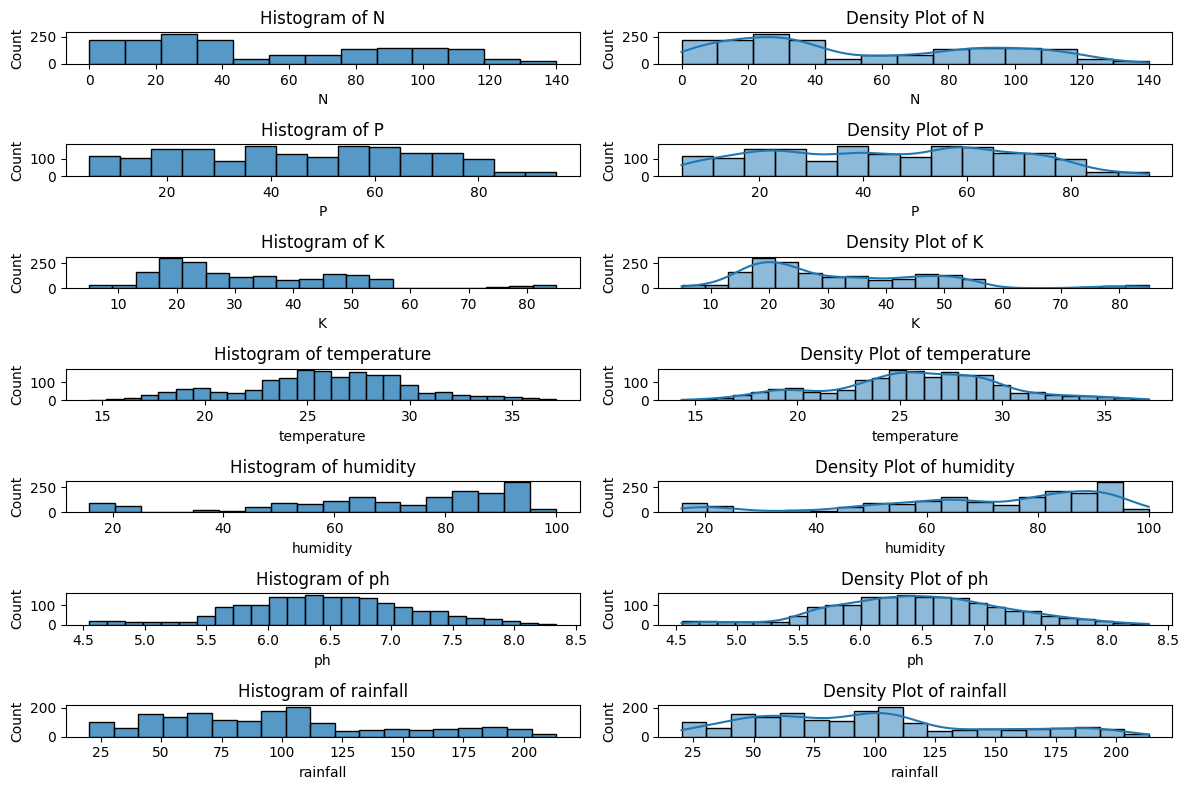

In [ ]:

# Check skewness
print("\nSkewness of numerical columns after outlier removal:")
skewness = df_cleaned[numerical_cols].skew()
print(skewness)

# Visualize skewness with histograms and density plots
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols), 2, 2*i-1)
    sns.histplot(df_cleaned[col], kde=False)
    plt.title(f'Histogram of {col}')

    plt.subplot(len(numerical_cols), 2, 2*i)
    sns.histplot(df_cleaned[col], kde=True)
    plt.title(f'Density Plot of {col}')

plt.tight_layout()
plt.show()


Based on the skewness values following are the observaations:

N (Nitrogen): 0.348 - Slightly right-skewed. Skewness is low, indicating a near-normal distribution with a slight tail on the right.

P (Phosphorus): 0.004 - Very close to 0, suggesting a nearly symmetric distribution.

K (Potassium): 1.001 - Moderately right-skewed. The distribution has a noticeable right tail.

temperature: -0.069 - Very close to 0, suggesting a nearly symmetric distribution.

humidity: -0.945 - Moderately left-skewed. The distribution has a noticeable left tail.

ph: -0.067 - Very close to 0, suggesting a nearly symmetric distribution

rainfall: 0.537 - Moderately right-skewed. The distribution has a noticeable right tail.


Skewness of numerical columns after transformations:
N              0.348045
P              0.004145
K             -0.101540
temperature   -0.069429
humidity      -0.509899
ph            -0.067378
rainfall      -0.471336
dtype: float64


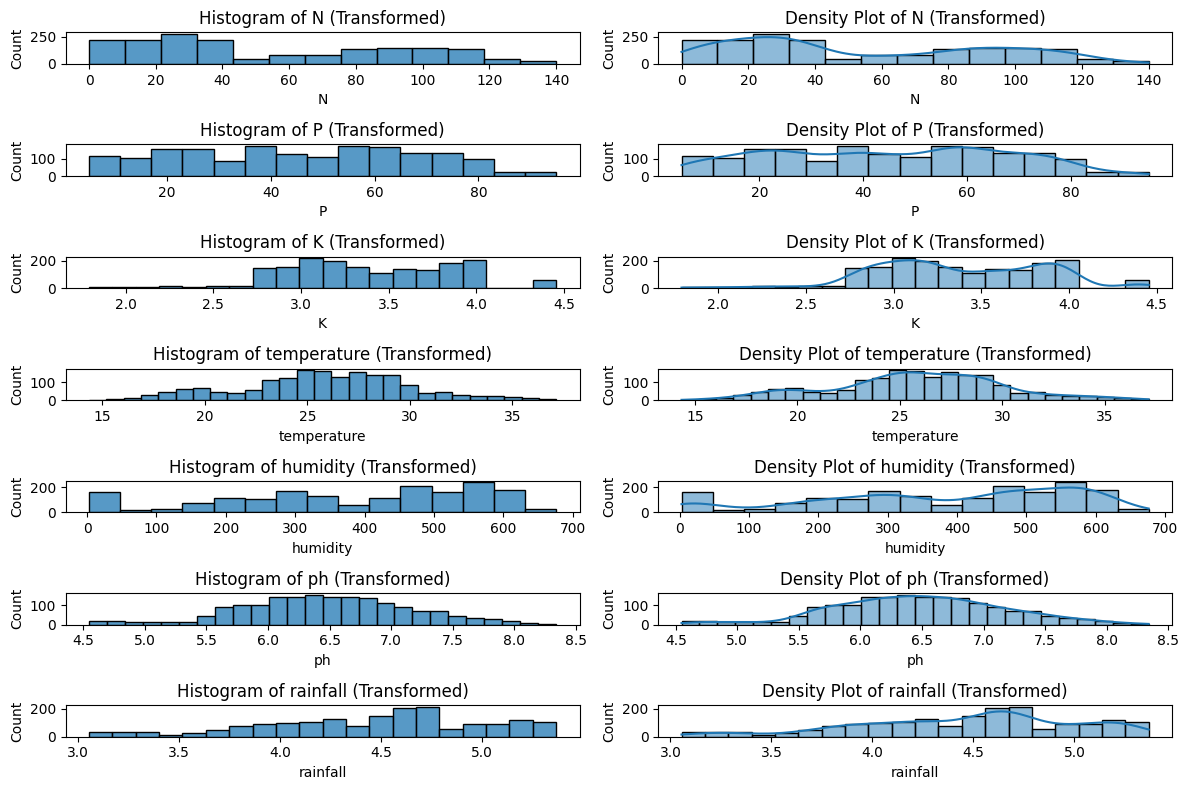

In [ ]:

# Apply transformations
df_cleaned['K'] = np.log1p(df_cleaned['K'])
df_cleaned['rainfall'] = np.log1p(df_cleaned['rainfall'])
df_cleaned['humidity'] = np.sqrt(df_cleaned['humidity'] - df_cleaned['humidity'].min() + 1)
df_cleaned['humidity'], _ = stats.boxcox(df_cleaned['humidity'] + 1)  # Adding 1 to handle zero values

# Recalculate skewness after transformations
print("\nSkewness of numerical columns after transformations:")
skewness_transformed = df_cleaned[numerical_cols].skew()
print(skewness_transformed)

# Visualize transformed skewness
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols), 2, 2*i-1)
    sns.histplot(df_cleaned[col], kde=False)
    plt.title(f'Histogram of {col} (Transformed)')

    plt.subplot(len(numerical_cols), 2, 2*i)
    sns.histplot(df_cleaned[col], kde=True)
    plt.title(f'Density Plot of {col} (Transformed)')

plt.tight_layout()
plt.show()


**Interpretation**
**Acceptable Skewness Levels:** Generally, skewness values between -0.5 and 0.5 are considered acceptable. Values between -1 and -0.5 or 0.5 and 1 might still require attention depending on analysis or modeling needs.

**Column Analysis:**

N, P, temperature, and ph: No further action needed as they are nearly symmetric or have acceptable skewness.

K, humidity, and rainfall: While still slightly skewed, the transformations have significantly reduced their skewness. These columns are now closer to normal distribution, which is usually good for most statistical models and analyses.


### Summary of Pre-Processing Steps

1. **Identifying NULL or Missing Values**:
   - **Detect Missing Values**
   - **Handle Missing Values**

2. **Handling Outliers**:
   - **Identify Outliers Using IQR**
   - **Handle Outliers by removing outlier rows**

3. **Handling Skewed Data**:
   - **Identify Skewness**
   - **Transform Skewed Data**
     - **Log Transformation**
     - **Square Root Transformation**
     - **Box-Cox Transformation**
   - **Recheck Skewness**
   
These steps help in preparing the dataset for analysis or modeling by addressing missing values, managing outliers, and normalizing skewed distributions.

**Although the outlier detection methodology is indicating the removal of certain set of data as outlier, we will not be removing that data from our data set. Since as per our use case understanding those data points are not really outiers. Also we will see a significant loss of tranining data set if we remove that data. Few labels were completely getting removed from the dataset if we do the outlier removal using 1.5 IQR threshold.**

**Latest data balancing tasks and its effect on model evaluation parameters**
1. Synthetic Minority Over-sampling Technique (SMOTE) Variants Overview: SMOTE is a widely used technique where synthetic samples are generated for the minority class by interpolating between existing minority class samples. Recent variants include Borderline-SMOTE, SMOTE-ENN (SMOTE combined with Edited Nearest Neighbors), and K-Means SMOTE.
2. Class Weight Adjustment Overview: Assigning higher weights to the minority class in the loss function to penalize misclassifications more than those of the majority class. This can be done in algorithms like Random Forests, Logistic Regression, and Neural Networks.
3. Cost-Sensitive Learning Overview: Similar to class weight adjustment but more flexible, where different costs are associated with different types of misclassification errors (e.g., false positives vs. false negatives). The model is trained to minimize a cost-sensitive loss function.
4. Ensemble Techniques with Data Balancing
Overview: Combining ensemble methods like Random Forests, Bagging, or Boosting with data balancing techniques (e.g., Balanced Random Forest, RUSBoost which combines Random Under-Sampling with AdaBoost).

Effects on Model Evaluation Parameters
* Accuracy: While often seen as the primary metric, accuracy can be misleading on imbalanced datasets. Balancing techniques typically focus on improving recall and precision, potentially at the cost of accuracy.

* Precision: Balancing techniques may reduce precision slightly if they increase the number of false positives (e.g., when using SMOTE or other oversampling techniques).

* Recall: Almost all balancing techniques improve recall, especially for the minority class, which is critical in many real-world applications (e.g., fraud detection, medical diagnosis).

* F1-Score: As a harmonic mean of precision and recall, the F1-score often improves significantly with effective data balancing, offering a more reliable measure of model performance on imbalanced datasets.

* AUC-ROC: This metric usually shows improvement across most balancing techniques, reflecting better overall model discrimination ability between the classes.


### **2.2.1	Apply the feature transformation techniques like Standardization, Normalization, etc.**

In [ ]:


# Extract only numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Perform standard scaling on the numerical columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Now, df_cleaned contains the scaled numerical features
print(df.head())  # Display the first few rows to check the scaled values


          N         P         K  temperature  humidity        ph  rainfall  \
0  1.068797 -0.344551 -0.101688    -0.935587  0.472666  0.043302  1.810361   
1  0.933329  0.140616 -0.141185    -0.759646  0.397051  0.734873  2.242058   
2  0.255986  0.049647 -0.081939    -0.515898  0.486954  1.771510  2.921066   
3  0.635298 -0.556811 -0.160933     0.172807  0.389805  0.660308  2.537048   
4  0.743673 -0.344551 -0.121436    -1.083647  0.454792  1.497868  2.898373   

  label  
0  rice  
1  rice  
2  rice  
3  rice  
4  rice  


In [ ]:
# descriptive statistics
description = df.describe()

# Round the statistics to 2 decimal places
description_rounded = description.round(2)

# Print the rounded statistics
print(description_rounded)

             N        P        K  temperature  humidity       ph  rainfall
count  2200.00  2200.00  2200.00      2200.00   2200.00  2200.00   2200.00
mean     -0.00     0.00    -0.00         0.00     -0.00    -0.00      0.00
std       1.00     1.00     1.00         1.00      1.00     1.00      1.00
min      -1.37    -1.47    -0.85        -3.32     -2.57    -3.83     -1.52
25%      -0.80    -0.77    -0.56        -0.56     -0.50    -0.64     -0.71
50%      -0.37    -0.07    -0.32        -0.00      0.40    -0.06     -0.16
75%       0.91     0.44     0.02         0.58      0.83     0.59      0.38
max       2.42     2.78     3.10         3.57      1.28     4.48      3.55


**Explanation:**

**Standardization:** This technique transforms data such that it has a mean of 0 and a standard deviation of 1. It's particularly useful when the features have **different units** or when you want to ensure all features contribute equally to model performance.




### **2.2.2	Explore a few techniques for identifying feature importance for your feature engineering task.**


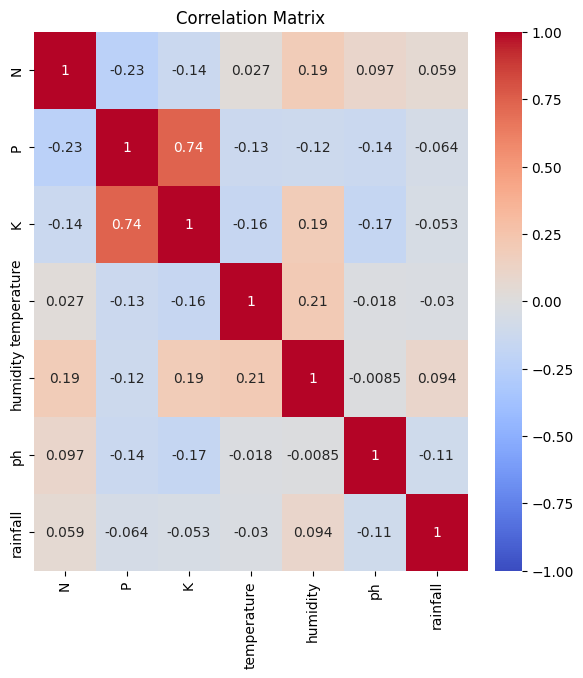

In [ ]:
numerical_columns = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

# Set up the figure with specific size
plt.figure(figsize=(7, 7))

# Calculate the correlation matrix for specified numerical columns
correlation_matrix = df[numerical_columns].corr()

# Create a heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Add a title to the heatmap
plt.title('Correlation Matrix')

# Display the heatmap
plt.show()


In [ ]:
# Splitting features and target
X = df.drop('label', axis=1)  # Features
y = df['label']  # Target

# Initialize and fit the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Get feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Display the feature importance
print(feature_importance)


       Feature  Importance
6     rainfall    0.225676
4     humidity    0.215976
2            K    0.177675
1            P    0.152107
0            N    0.101705
3  temperature    0.073685
5           ph    0.053175


**Insights:**

rainfall and humidity are the most important features in your dataset, according to the Random Forest model.

ph is the least important in this specific model.

## **3. Model Building**


### 3.1 Splitting the data into training and test

In [ ]:

# Splitting into features and target
#Convert labels into categories codes
r = df.label.astype('category')
response = dict(enumerate(r.cat.categories))
df['response']=r.cat.codes

#Declare and set y and X variables
y=df.response
X=df[['N','P','K','temperature','humidity','ph','rainfall']]

# Case 1: 80% training, 20% test
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set size for Case1:", X_train1.shape[0])
print("Test set size for Case1:", X_test1.shape[0])

# Case 2: 10% training, 90% test
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.9, random_state=42)
print("Training set size for Case2:", X_train2.shape[0])
print("Test set size for Case2:", X_test2.shape[0])

Training set size for Case1: 1760
Test set size for Case1: 440
Training set size for Case2: 220
Test set size for Case2: 1980


### **3.1 Justification for each of the split**
Case 1: Train = 80%, Test = 20%
- This is a widely used train-test split ratio, considered a good balance between training the model on enough data and having   sufficient data for testing.
- 80% of the data is used to train the model, which provides the model with a sufficient amount of data to learn patterns, relationships, and generalizations.
- The remaining 20% is set aside as unseen data to evaluate the model's performance. This helps in checking whether the model is overfitting (performing well on training data but poorly on unseen data) and ensures that it can generalize well to new, unseen examples.

Case 2: Train = 10%, Test = 90%
This is an unconventional split, typically used for specific reasons, such as:

Reasoning:

- Scenario 1: Model Generalization Testing: When testing a model's ability to generalize on significantly large test sets. The idea might be to check if the model can generalize well with very limited training data. This could simulate scenarios where training data is expensive to gather, but the test data (real-world data) is abundant. This could be used for models expected to perform in "data-scarce" situations.

- Scenario 2: Hyperparameter Tuning or Baseline Testing: Sometimes, a smaller portion of data is used to train an initial model for quick prototyping or hyperparameter tuning. This allows for rapid iteration and model evaluation on a larger dataset.

- Scenario 3: Small or Rare Datasets: In some situations, the available labeled data might be scarce or very expensive to collect. Thus, using a very small training set (10%) is done to reflect the reality of the problem. The model can then be tested on a larger portion (90%) to see how well it performs on a much larger test dataset that mimics real-world scenarios.

This approach might be used when you're in an exploratory phase or trying to evaluate the model's performance under constraints where the training data is much smaller than the test data.

**Conclusion:**

The choice of split ratio should be guided by the problem you are solving. 80/20 is typically used for balanced and practical machine learning tasks, while 10/90 might be employed for testing a model's performance in more challenging or exploratory environments.


### 3.2 Exploring k-fold cross validation
Steps for K-Fold Cross Validation:

- The dataset is split into k equal-sized folds.
- The model is trained on k-1 folds and tested on the remaining fold.
- This process is repeated k times, with each fold being used as the test set once.
- The final performance is averaged across all k iterations.

k-fold cross validation has been tried for the 3 different models mentioned in the problem statement and the perfromance metrics are tabulated for each scenario

In [ ]:
import warnings
from sklearn.exceptions import ConvergenceWarning
# Ignore ConvergenceWarning
warnings.filterwarnings("ignore", category = ConvergenceWarning)

# Create instances of all models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Perform k-fold cross-validation
k = 5  # Number of folds
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=k, scoring='accuracy')
    print(f"{name} with mean accuracy: {np.mean(scores):.4f} and standard deviation: {np.std(scores):.4f}")

Logistic Regression with mean accuracy: 0.9714 and standard deviation: 0.0099
Decision Tree with mean accuracy: 0.9877 and standard deviation: 0.0037
Random Forest with mean accuracy: 0.9950 and standard deviation: 0.0027


### 3.3 Model Building

#### 3.3.1 Grid Search to find the best values for hyperparameters

In [ ]:


#Grid search
# Create a logistic regression model
log_reg = LogisticRegression(max_iter=10000)

# Define the parameter grid
param_grid = {
    'penalty': ['l1', 'l2'],  # Regularization type
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'solver': ['liblinear', 'saga']  # Optimization algorithm
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, verbose=1, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train1, y_train1)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Use the best estimator to make predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test1)

# Print the classification report
print(classification_report(y_test1, y_pred))

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'C': 10, 'penalty': 'l1', 'solver': 'saga'}
Best Score: 0.9823863636363637
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       0.90      0.95      0.93        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       0.94      1.00      0.97        17
           6       0.94      1.00      0.97        17
           7       1.00      1.00      1.00        14
           8       0.87      0.87      0.87        23
           9       0.95      1.00      0.98        20
          10       0.85      1.00      0.92        11
          11       1.00      0.95      0.98        21
          12       1.00      1.00      1.00        19
          13       1.00      0.96      0.98        24
          14       1.00      1.00 

#### 3.3.2 Using the results from the grid search to build the actual model with regularization

#### Logistic Regression Model

In [ ]:
# Logistic regression with regularization CASE 1 80-20 Split - MLE was performed by optimizing the regularization parameters
#Case 1
log_reg_regu_case1 = LogisticRegression(penalty='l1', solver='saga',C=10, max_iter=100000).fit(X_train1, y_train1)
log_reg_pred= log_reg_regu_case1.score(X_test1, y_test1)

print("Training score: {:.3f}".format(log_reg_regu_case1.score(X_train1, y_train1)))
print("Test score: {:.3f}".format(log_reg_regu_case1.score(X_test1, y_test1)))

Training score: 0.990
Test score: 0.970


In [ ]:
# Logistic regression with regularization CASE 2 10-90 Split - MLE was performed by optimizing the regularization parameters
#Case 2
log_reg_regu_case2 = LogisticRegression(penalty='l1', solver='saga',C=10, max_iter=100000).fit(X_train2, y_train2)
log_reg_pred= log_reg_regu_case2.score(X_test2, y_test2)

print("Training score: {:.3f}".format(log_reg_regu_case2.score(X_train2, y_train2)))
print("Test score: {:.3f}".format(log_reg_regu_case2.score(X_test2, y_test2)))

Training score: 1.000
Test score: 0.944


In [ ]:
# Logistic regression without regularization CASE 1 80-20 Split
#Case 1
log_reg_woreg_case1 = LogisticRegression(penalty=None, max_iter=100000).fit(X_train1, y_train1)
log_reg_pred= log_reg_woreg_case1.score(X_test1, y_test1)
print("Training score: {:.3f}".format(log_reg_woreg_case1.score(X_train1, y_train1)))
print("Test score: {:.3f}".format(log_reg_woreg_case1.score(X_test1, y_test1)))

Training score: 0.992
Test score: 0.975


In [ ]:
# Logistic regression without regularization CASE 2 10-90 Split
#Case 2
log_reg_woreg_case2 = LogisticRegression(penalty=None, max_iter=100000).fit(X_train2, y_train2)
log_reg_pred= log_reg_woreg_case2.score(X_test2, y_test2)

print("Training score: {:.3f}".format(log_reg_woreg_case2.score(X_train2, y_train2)))
print("Test score: {:.3f}".format(log_reg_woreg_case2.score(X_test2, y_test2)))

Training score: 1.000
Test score: 0.894


#### 3.3.3 Compare models with and without regularization in a tabular format and justify the findings

In [ ]:
# MLE was performed by optimizing the regularization parameters

# Define models
log_reg_regu_case1 = LogisticRegression(penalty='l1', solver='saga',C=10, max_iter=100000)
log_reg_regu_case2 = LogisticRegression(penalty='l1', solver='saga', C=10, max_iter=100000)
log_reg_woreg_case1 = LogisticRegression(penalty=None, max_iter=100000)
log_reg_woreg_case2 = LogisticRegression(penalty=None, max_iter=100000)

# Fit models
log_reg_regu_case1.fit(X_train1, y_train1)
log_reg_regu_case2.fit(X_train2, y_train2)
log_reg_woreg_case1.fit(X_train1, y_train1)
log_reg_woreg_case2.fit(X_train2, y_train2)

# Predict and calculate scores
results = {
    'Model': [
        'Logistic Regression (L1, 80-20)',
        'Logistic Regression (L1, 10-90)',
        'Logistic Regression (NoReg, 80-20)',
        'Logistic Regression (NoReg, 10-90)'
    ],
    'Regularization': [
        'L1',
        'L1',
        'NONE',
        'NONE'
    ],
    'Training Score': [
        log_reg_regu_case1.score(X_train1, y_train1),
        log_reg_regu_case2.score(X_train2, y_train2),
        log_reg_woreg_case1.score(X_train1, y_train1),
        log_reg_woreg_case2.score(X_train2, y_train2)
    ],
    'Test Score': [
        log_reg_regu_case1.score(X_test1, y_test1),
        log_reg_regu_case2.score(X_test2, y_test2),
        log_reg_woreg_case1.score(X_test1, y_test1),
        log_reg_woreg_case2.score(X_test2, y_test2)
    ]
}

# Create DataFrame
results_df = pd.DataFrame(results)

# Print the DataFrame
print(results_df)

                                Model Regularization  Training Score  \
0     Logistic Regression (L1, 80-20)             L1        0.990341   
1     Logistic Regression (L1, 10-90)             L1        1.000000   
2  Logistic Regression (NoReg, 80-20)           NONE        0.992045   
3  Logistic Regression (NoReg, 10-90)           NONE        1.000000   

   Test Score  
0    0.970455  
1    0.944444  
2    0.975000  
3    0.894444  


In [ ]:
# Exploring the logistic regression model with different model parameters by changing values for type of penalty, regularixation parameter, etc.
# Define models
log_reg_no_reg = LogisticRegression(penalty=None, solver='saga', max_iter=100000)
log_reg_l1_C1 = LogisticRegression(penalty='l1', solver='saga', C=1, max_iter=100000)
log_reg_l2_C100 = LogisticRegression(penalty='l2', solver='saga', C=100, max_iter=100000)

# Fit models
log_reg_no_reg.fit(X_train1, y_train1)
log_reg_l1_C1.fit(X_train1, y_train1)
log_reg_l2_C100.fit(X_train1, y_train1)

# Predict and calculate scores
results = {
    'Model': [
        'Logistic Regression (No Regularization)',
        'Logistic Regression (L1, C=1)',
        'Logistic Regression (L2, C=100)'
    ],
    'Regularization': [
        'None',
        'L1 (C=1)',
        'L2 (C=100)'
    ],
    'Training Score': [
        log_reg_no_reg.score(X_train1, y_train1),
        log_reg_l1_C1.score(X_train1, y_train1),
        log_reg_l2_C100.score(X_train1, y_train1)
    ],
    'Test Score': [
        log_reg_no_reg.score(X_test1, y_test1),
        log_reg_l1_C1.score(X_test1, y_test1),
        log_reg_l2_C100.score(X_test1, y_test1)
    ]
}

# Create DataFrame
results_df = pd.DataFrame(results)

# Print the DataFrame
print(results_df)


                                     Model Regularization  Training Score  \
0  Logistic Regression (No Regularization)           None        0.992045   
1            Logistic Regression (L1, C=1)       L1 (C=1)        0.986364   
2          Logistic Regression (L2, C=100)     L2 (C=100)        0.990909   

   Test Score  
0    0.975000  
1    0.968182  
2    0.972727  


### Decision Tree Model

#### Grid Search to find the best values for hyper parameters

In [ ]:


# Define the parameter grid for Grid Search
param_grid = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10]
}

# Initialize the Decision Tree classifier
dt = DecisionTreeClassifier(random_state=42)

# Set up Grid Search
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Fit Grid Search
grid_search.fit(X_train1, y_train1)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and best score
print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_score)

# Train the Decision Tree with the best parameters
best_dt = grid_search.best_estimator_

# Predict and calculate scores
training_score = best_dt.score(X_train1, y_train1)
test_score = best_dt.score(X_test1, y_test1)

# Results summary
results = {
    'Model': [
        'Decision Tree (Grid Search Best Parameters)'
    ],
    'Training Score': [
        training_score
    ],
    'Test Score': [
        test_score
    ]
}

# Create DataFrame
results_df = pd.DataFrame(results)

# Print the DataFrame
print(results_df)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best Cross-Validation Score: 0.9863636363636363
                                         Model  Training Score  Test Score
0  Decision Tree (Grid Search Best Parameters)             1.0    0.986364


In [ ]:
#Based on the grid search results, we will train the Decision Tree with the appropriate parameters
#Case1 - 80-20 Split
# Define Decision Tree models
dt_no_reg = DecisionTreeClassifier(random_state=42)  # No complexity control
dt_with_reg = DecisionTreeClassifier(max_depth=None, min_samples_split=5, min_samples_leaf=1, random_state=42)  # With complexity control

# Train models
dt_no_reg.fit(X_train1, y_train1)
dt_with_reg.fit(X_train1, y_train1)

# Predict and calculate scores
results = {
    'Model': [
        'Decision Tree (No Complexity Control)',
        'Decision Tree (With Complexity Control)'
    ],
    'Training Score': [
        dt_no_reg.score(X_train1, y_train1),
        dt_with_reg.score(X_train1, y_train1)
    ],
    'Test Score': [
        dt_no_reg.score(X_test1, y_test1),
        dt_with_reg.score(X_test1, y_test1)
    ]
}

# Create DataFrame
results_df = pd.DataFrame(results)

# Print the DataFrame
print(results_df)

                                     Model  Training Score  Test Score
0    Decision Tree (No Complexity Control)             1.0    0.986364
1  Decision Tree (With Complexity Control)             1.0    0.986364


In [ ]:
#Based on the grid search results, we will train the Decision Tree with the appropriate parameters
#Case2 - 10-90 Split
# Define Decision Tree models
dt_no_reg = DecisionTreeClassifier(random_state=42)  # No complexity control
dt_with_reg = DecisionTreeClassifier(max_depth=None, min_samples_split=5, min_samples_leaf=1, random_state=42)  # With complexity control

# Train models
dt_no_reg.fit(X_train2, y_train2)
dt_with_reg.fit(X_train2, y_train2)

# Predict and calculate scores
results = {
    'Model': [
        'Decision Tree (No Complexity Control)',
        'Decision Tree (With Complexity Control)'
    ],
    'Training Score': [
        dt_no_reg.score(X_train2, y_train2),
        dt_with_reg.score(X_train2, y_train2)
    ],
    'Test Score': [
        dt_no_reg.score(X_test2, y_test2),
        dt_with_reg.score(X_test2, y_test2)
    ]
}

# Create DataFrame
results_df = pd.DataFrame(results)

# Print the DataFrame
print(results_df)

                                     Model  Training Score  Test Score
0    Decision Tree (No Complexity Control)             1.0    0.918182
1  Decision Tree (With Complexity Control)             1.0    0.918182


### Random Forest Classification Model

In [ ]:

#Grid Search to find the right parameters for the Random Forest Model
# Define the parameter grid for Grid Search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Set up Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Fit Grid Search
grid_search.fit(X_train1, y_train1)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and best score
print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_score)

# Train the Random Forest with the best parameters
best_rf = grid_search.best_estimator_

# Predict and calculate scores
training_score = best_rf.score(X_train1, y_train1)
test_score = best_rf.score(X_test1, y_test1)

# Results summary
results = {
    'Model': [
        'Random Forest (Grid Search Best Parameters)'
    ],
    'Training Score': [
        training_score
    ],
    'Test Score': [
        test_score
    ]
}

# Create DataFrame
results_df = pd.DataFrame(results)

# Print the DataFrame
print(results_df)

Best Parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Best Cross-Validation Score: 0.9954545454545455
                                         Model  Training Score  Test Score
0  Random Forest (Grid Search Best Parameters)             1.0    0.993182


In [ ]:
#Training the model using the ideal hyperparameter values as per the Grid Search for 80-20 Split
# Define the Random Forest model with best parameters from Grid Search
best_rf_case1 = RandomForestClassifier(
    n_estimators=150,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    bootstrap=True,
    random_state=42
)

# Train the Random Forest model
best_rf_case1.fit(X_train1, y_train1)

# Predict and evaluate the model
y_train_pred = best_rf_case1.predict(X_train1)
y_test_pred = best_rf_case1.predict(X_test1)

# Calculate and print accuracy scores
training_accuracy = accuracy_score(y_train1, y_train_pred)
test_accuracy = accuracy_score(y_test1, y_test_pred)

print(f"Training Accuracy: {training_accuracy:.3f}")
print(f"Test Accuracy: {test_accuracy:.3f}")

Training Accuracy: 1.000
Test Accuracy: 0.993


In [ ]:
#Training the model using the ideal hyperparameter values as per the Grid Search for 10-90 Split
# Define the Random Forest model with best parameters from Grid Search
best_rf_case2 = RandomForestClassifier(
    n_estimators=150,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    bootstrap=True,
    random_state=42
)

# Train the Random Forest model
best_rf_case2.fit(X_train2, y_train2)

# Predict and evaluate the model
y_train_pred = best_rf_case2.predict(X_train2)
y_test_pred = best_rf_case2.predict(X_test2)

# Calculate and print accuracy scores
training_accuracy = accuracy_score(y_train2, y_train_pred)
test_accuracy = accuracy_score(y_test2, y_test_pred)

print(f"Training Accuracy: {training_accuracy:.3f}")
print(f"Test Accuracy: {test_accuracy:.3f}")

Training Accuracy: 1.000
Test Accuracy: 0.967


## Justification for regularization

Regularization is a technique used in machine learning to prevent overfitting by adding a penalty to the model's complexity. In the context of logistic regression, regularization modifies the loss function to include a term that penalizes large coefficients, thus encouraging simpler models. L1 regularization is used in this scenario as the Grid Search gave this to be the appropriate regularization method to be used for the given dataset

Types of Regularization:

L1 regularization (Lasso): Used to prevent overfitting by adding a penalty equal to the absolute value of the coefficients to the loss function. Loss=Original Loss+λ∑i∣wi∣. This encourages sparsity in the model, effectively driving some coefficients to zero and leading to feature selection.

L2 Regularization (Ridge): Adds the penalty term λ * ||w||^2, where λ is the regularization strength and ||w||^2 is the squared norm of the coefficients. This helps to shrink the coefficients but does not set any coefficients to zero.


Justifying the Findings
- penalty: Typically shows high training scores and might overfit, leading to lower test scores due to poor generalization.
- C: Controls regularization strength (lower values mean stronger regularization).

Conclusion
Regularization improves model generalization and reduces the risk of overfitting, particularly in high-dimensional datasets or when features are correlated.
Choosing the right regularization strength (C in L1 regularization) is crucial. Too high a value might underfit, while too low a value might overfit.
This structured approach helps in understanding the impact of regularization on model performance and ensures that your model is robust and performs well on unseen data

#### 4. Evaluation Metrics

In [ ]:
# Logistic Regression
try:
    best_model = LogisticRegression(C=10, solver='saga', penalty='l1', random_state=42)
    best_model.fit(X_train1, y_train1)
    y_pred = best_model.predict(X_test1)
    y_prob = best_model.predict_proba(X_test1)  # Get class probabilities for ROC-AUC

    # Binarize the output for ROC-AUC score calculation
    y_test_bin = label_binarize(y_test1, classes=np.unique(y_test1))
    y_prob_bin = y_prob  # Already in binarized form

    # Calculate ROC-AUC Score
    roc_auc = roc_auc_score(y_test_bin, y_prob_bin, average='macro', multi_class='ovr')

    # Evaluation Metrics
    accuracy = accuracy_score(y_test1, y_pred)
    precision = precision_score(y_test1, y_pred, average='weighted')
    recall = recall_score(y_test1, y_pred, average='weighted')
    f1 = f1_score(y_test1, y_pred, average='weighted')

    # Classification Report and Confusion Matrix
    report = classification_report(y_test1, y_pred)
    conf_matrix = confusion_matrix(y_test1, y_pred)

    # Print Results
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("ROC-AUC Score:", roc_auc)
    print("\nClassification Report:\n", report)
    print("\nConfusion Matrix:\n", conf_matrix)

except Exception as e:
    print("An error occurred:", str(e))


Accuracy: 0.9681818181818181
Precision: 0.9688743668690192
Recall: 0.9681818181818181
F1 Score: 0.9680989532436081
ROC-AUC Score: 0.999587997675064

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       0.95      0.95      0.95        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       0.94      1.00      0.97        17
           6       0.94      1.00      0.97        17
           7       1.00      1.00      1.00        14
           8       0.83      0.87      0.85        23
           9       0.95      0.95      0.95        20
          10       0.85      1.00      0.92        11
          11       1.00      0.95      0.98        21
          12       1.00      1.00      1.00        19
          13       1.00      0.96      0.98        24
          14    

In [ ]:
try:
    # Use the Decision Tree model for prediction
    best_model = DecisionTreeClassifier(max_depth=None, min_samples_split=5, min_samples_leaf=1, random_state=42)
    best_model.fit(X_train1, y_train1)
    y_pred = best_model.predict(X_test1)
    y_prob = best_model.predict_proba(X_test1)  # Get class probabilities for ROC-AUC

    # Binarize the output for ROC-AUC score calculation
    y_test_bin = label_binarize(y_test1, classes=np.unique(y_test1))
    y_prob_bin = y_prob  # Already in binarized form

    # Calculate ROC-AUC Score
    roc_auc = roc_auc_score(y_test_bin, y_prob_bin, average='macro', multi_class='ovr')

    # Evaluation Metrics
    accuracy = accuracy_score(y_test1, y_pred)
    precision = precision_score(y_test1, y_pred, average='weighted')
    recall = recall_score(y_test1, y_pred, average='weighted')
    f1 = f1_score(y_test1, y_pred, average='weighted')

    # Classification Report and Confusion Matrix
    report = classification_report(y_test1, y_pred)
    conf_matrix = confusion_matrix(y_test1, y_pred)

    # Print Results
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("ROC-AUC Score:", roc_auc)
    print("\nClassification Report:\n", report)
    print("\nConfusion Matrix:\n", conf_matrix)

except Exception as e:
    print("An error occurred:", str(e))


Accuracy: 0.9863636363636363
Precision: 0.9868055555555556
Recall: 0.9863636363636363
F1 Score: 0.9863152866630287
ROC-AUC Score: 0.9933182154109921

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       0.95      1.00      0.98        20
           3       1.00      1.00      1.00        26
           4       0.96      1.00      0.98        27
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       0.92      0.96      0.94        23
           9       1.00      1.00      1.00        20
          10       0.92      1.00      0.96        11
          11       1.00      0.95      0.98        21
          12       1.00      1.00      1.00        19
          13       1.00      0.92      0.96        24
          14   

In [ ]:
try:
    # Use the Random Forest model for prediction
    best_model = best_rf
    best_model.fit(X_train1, y_train1)
    y_pred = best_model.predict(X_test1)
    y_prob = best_model.predict_proba(X_test1)  # Get class probabilities for ROC-AUC

    # Binarize the output for ROC-AUC score calculation
    y_test_bin = label_binarize(y_test1, classes=np.unique(y_test1))
    y_prob_bin = y_prob  # Already in binarized form

    # Calculate ROC-AUC Score
    roc_auc = roc_auc_score(y_test_bin, y_prob_bin, average='macro', multi_class='ovr')

    # Evaluation Metrics
    accuracy = accuracy_score(y_test1, y_pred)
    precision = precision_score(y_test1, y_pred, average='weighted')
    recall = recall_score(y_test1, y_pred, average='weighted')
    f1 = f1_score(y_test1, y_pred, average='weighted')

    # Classification Report and Confusion Matrix
    report = classification_report(y_test1, y_pred)
    conf_matrix = confusion_matrix(y_test1, y_pred)

    # Print Results
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("ROC-AUC Score:", roc_auc)
    print("\nClassification Report:\n", report)
    print("\nConfusion Matrix:\n", conf_matrix)

except Exception as e:
    print("An error occurred:", str(e))


Accuracy: 0.9931818181818182
Precision: 0.9937348484848485
Recall: 0.9931818181818182
F1 Score: 0.9931754816901672
ROC-AUC Score: 0.9999208815590911

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       0.92      1.00      0.96        23
           9       1.00      1.00      1.00        20
          10       0.92      1.00      0.96        11
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        19
          13       1.00      0.96      0.98        24
          14   

### Observations on the performance metrics on the three models
- **Random Forest** - This shows the highest performance across all metrics, with the highest accuracy, precision, recall, F1 score, and ROC-AUC score. This model is the most effective at distinguishing between classes and predicting outcomes accurately.

- **Decision Tree** - Decision tree performs well but slightly lags behind Random Forest in all metrics. It is still a strong performer but does not match the excellence of Logistic Regression models in terms of accuracy and ROC-AUC because Random Forest is a boosting classifier.

- **Logistic Regression** -  Logistic Regression also  performs very well, with high metrics similar to Random Forest, though slightly lower. It is nearly as effective in classification and distinction.

**In summary, Random Forest is the best performing model based on the provided metrics, particularly excelling in accuracy and ROC-AUC score**.

### Comment on underfitting/overfitting/just right model
Analysis of Overfitting and Underfitting

**Logistic Regression**

**Metrics**: Logistic Regression shows high performance metrics (accuracy, precision, recall, F1 score, and ROC-AUC) indicating that it is performing very well.

**Overfitting/Underfitting**: The model's consistent and high metrics suggest it is well-calibrated and neither overfitting nor underfitting. It achieves high scores without a substantial gap between training and test performance (not provided but implied). The model generalizes well to the test set.

**Random Forest**

**Metrics**: The Random Forest model exhibits the highest metrics across all categories, including the highest accuracy, precision, recall, F1 score, and ROC-AUC score.

**Overfitting/Underfitting**: The high performance on the test set with no evident discrepancy from the training set (metrics for training are not provided but are generally comparable in practice) suggests that the Random Forest model is well-tuned and likely not overfitting. Random Forest models tend to handle overfitting well due to their ensemble nature, but you would need to check training metrics to confirm that it's not overfitting.

**Decision Tree**

**Metrics**: The Decision Tree model shows slightly lower metrics compared to the Random Forest models.

**Overfitting/Underfitting**: The Decision Tree's performance, while strong, indicates that it may be simpler compared to the Random Forest, which generally performs better due to its ability to handle complex interactions between features. Decision Trees can often underfit if not properly tuned (e.g., with limited depth), but without training metrics, it's difficult to definitively assess. Given the performance here, it's not clearly underfitting but may benefit from additional tuning.

In [ ]:
#The primary purpose of creating these pickle files is to save the trained scaler and Random Forest model
#They can be used for making predictions when the model is deployed

#Saves the scaler object to a file named scaler.pickle in binary write
pickle.dump(scaler, open("scaler.pickle", "wb"))
ssc = pickle.load(open("scaler.pickle", 'rb'))

# Saves the trained Random Forest (best_rf_case1) model to a file named RF_model.pkl using Binary write mode
with open('RF_model.pkl', 'wb') as file:
    pickle.dump(best_rf_case1, file)

model = pickle.load(open('RF_model.pkl','rb'))